Подключаем библиотеки

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Загружаем data frame, столбец 'PassengerId' будет служить индексами строк

In [3]:
df = pd.read_csv('train.csv', index_col='PassengerId')

# Context

https://www.kaggle.com/c/tabular-playground-series-apr-2021/overview

Посмотрим на первые 10 строк

In [4]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


Посмотрим на размер таблицы

In [5]:
df.shape

(100000, 11)

В таблице 100 тысяч строк и 11 столбцов

Посмотрим есть ли пропущенные значения и на типы данных в столбцах

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [7]:
df.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

Видим, что есть пропущенные значения в столбцах 'Age', 'Ticket', 'Fare', 'Cabin' и 'Embarked'

# Data quality assessment

удалим дубликаты, если таковы есть

In [8]:
df.drop_duplicates()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


### Столбец "Survived"
бинарный признак обозначающий выжил ли данный пассажир (0 = No, 1 = Yes)

Посмотрим на выживаемость

<AxesSubplot:xlabel='Survived', ylabel='count'>

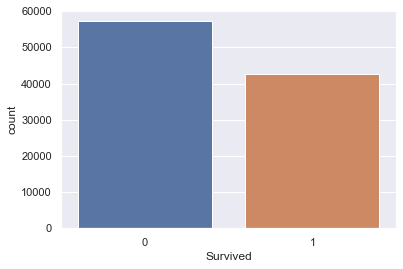

In [9]:
sns.countplot(x='Survived', data=df)

Большинство пассажиров погибло

### Столбец "Pclass"
упорядоченный признак обозначающий класс пассажира

<AxesSubplot:xlabel='Pclass', ylabel='count'>

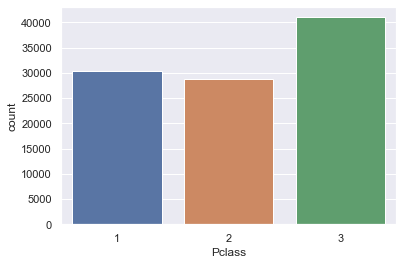

In [10]:
sns.countplot(x='Pclass', data=df)

больше всего пассажиров из третьего класса

### Столбец "Name"
имя паасажира

In [11]:
df['Name'].value_counts()

Johnson, John        31
Smith, James         24
Smith, John          24
Johnson, William     22
Smith, Michael       20
                     ..
Davis, Andre          1
Rosenblum, Ronald     1
Landry, Ernesto       1
Mcdonald, Frances     1
Enciso, Tyler         1
Name: Name, Length: 92144, dtype: int64

Видим довольно много людей с одинаковыми именем и фамилией

посмотрим на самого популярного, чтобы увидеть, что это не дубликаты

In [12]:
df[df['Name']=='Johnson, John'].sort_values(by='Age')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
19056,0,3,"Johnson, John",male,8.0,0,0,467116,49.47,NaN,S
57925,0,2,"Johnson, John",male,14.0,0,1,332905,4.30,NaN,S
65185,0,3,"Johnson, John",male,18.0,0,0,6408,8.18,NaN,S
32384,0,3,"Johnson, John",male,21.0,0,0,43246,25.34,NaN,S
5045,0,3,"Johnson, John",male,21.0,0,0,13238,9.26,NaN,S
33425,0,3,"Johnson, John",male,22.0,0,0,A. 28425,9.40,NaN,S
17252,0,3,"Johnson, John",male,23.0,0,0,14162,10.60,NaN,S
7618,0,3,"Johnson, John",male,24.0,1,0,12180,14.07,NaN,S
71084,0,3,"Johnson, John",male,24.0,0,0,337535,6.64,NaN,S


дубликатов не наболюдаем, значит это все разные люди

### Столбец "Sex"
~~был ли секс у пассажира во время путешествия~~ бинарный признак обозначающий пол пассажира (0 - женщина, 1 - мужчина)

In [13]:
df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})

<AxesSubplot:xlabel='Sex', ylabel='count'>

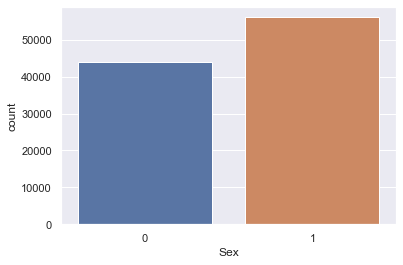

In [14]:
sns.countplot(x='Sex', data=df)

На Титанике было больше мужчин, чем женщин

### Столбец "Age"
числовой признак обозначающий возраст пассажира

Заменим пропущенные значения на медианное

In [15]:
age_median = df['Age'].median()
print(age_median)

39.0


In [16]:
df['Age'] = df['Age'].fillna(age_median)

Посмотрим на распределение пассажиров по возросту

<AxesSubplot:xlabel='Age', ylabel='Count'>

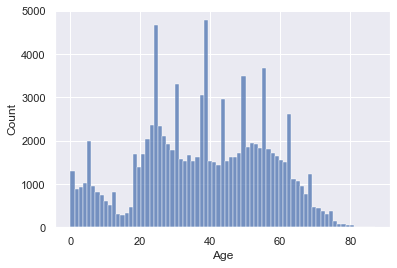

In [17]:
sns.histplot(df['Age'])

дополнительно посмотрим на параметры значений

In [18]:
df['Age'].describe()

count    100000.000000
mean         38.376690
std          18.009956
min           0.080000
25%          25.000000
50%          39.000000
75%          53.000000
max          87.000000
Name: Age, dtype: float64

### Столбец "SibSp"
количество братьев, сестер, и супругов пассажиров

### Столбец "Parch"
количество родителей и детей пассажиров

### Столбец "Ticket"
номера билетов пассажиров

Заменим пропущенные значения на 'without'

In [19]:
df['Ticket'] = df['Ticket'].fillna('without')

### Столбец "Fare"
стоимость билета

Заменим пропущенные значения на среднюю цену

In [20]:
df['Fare'].fillna(np.mean(df['Fare']), inplace=True)

Посмотрим на распределение пассажиров по цене за билет

<AxesSubplot:xlabel='Fare', ylabel='Count'>

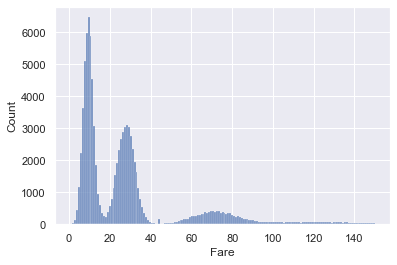

In [21]:
sns.histplot(df[df['Fare']<150]['Fare'])

Видим три отчетливых локальных максимума, скорее всего это три разных класса

дополнительно посмотрим на параметры значений

In [22]:
df['Fare'].describe()

count    100000.00000
mean         43.92933
std          69.54218
min           0.68000
25%          10.04000
50%          24.49000
75%          33.56000
max         744.66000
Name: Fare, dtype: float64

Удивительно, что самы дешевый билет стоит 0.68, а самый дорогой 744.66, посмотрим сколько людей заплатило больше 500

In [23]:
len(df[df['Fare']>500])

343

Видимо, что это не выбросы, а страшно богатые люди

### Столбец "Cabin"
номер каюты

Заменим пропущенные значения на 'N'

In [24]:
df['Cabin'] = df['Cabin'].fillna('N')

номера кают начианются на какую-то букву, занесем их в отдельный столбец

In [25]:
df['Cabin_type'] = df['Cabin'].str.extract('([A-Z])')

<AxesSubplot:xlabel='Cabin_type', ylabel='Count'>

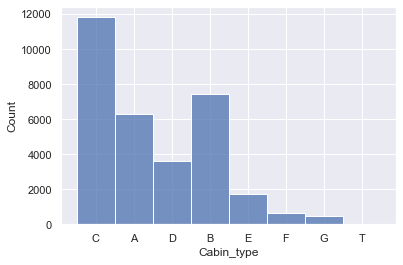

In [26]:
sns.histplot(df[df['Cabin_type']!='N']['Cabin_type'])

Видим, что большинство кают были типа A, B и C (буквой N обозначаются пассажиры без указанного номера каюты)

### Столбец "Embarked"
порт посадки

Заменим пропущенные значения на 'N'

In [27]:
df['Embarked'] = df['Embarked'].fillna('N')

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

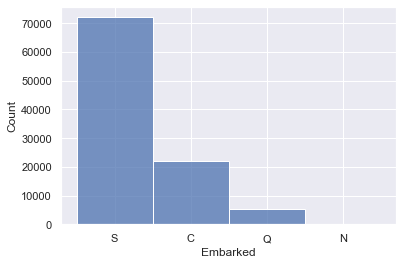

In [28]:
sns.histplot(df['Embarked'])

Видим, что большинство пассажиров плыло из Southampton

Убедимся, что теперь нет пропущенных значений в столбцах

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Survived    100000 non-null  int64  
 1   Pclass      100000 non-null  int64  
 2   Name        100000 non-null  object 
 3   Sex         100000 non-null  int64  
 4   Age         100000 non-null  float64
 5   SibSp       100000 non-null  int64  
 6   Parch       100000 non-null  int64  
 7   Ticket      100000 non-null  object 
 8   Fare        100000 non-null  float64
 9   Cabin       100000 non-null  object 
 10  Embarked    100000 non-null  object 
 11  Cabin_type  100000 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 11.9+ MB


# Data exploration

Посмотрим корреляционную матрицу

Text(0.5, 1.0, 'Тепловая карта корреляций')

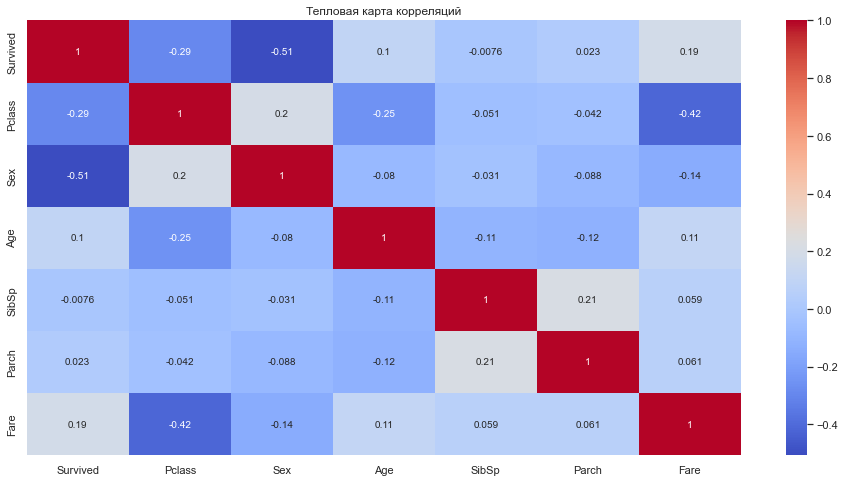

In [30]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title('Тепловая карта корреляций')

Сразу видим зависимость выживаемости от класса каюты и пола, зависимость цены билета от класса и зависимость класса каюты от возраста

Отдельно отметим, что количество родственников на Титанике нисколько не увеличивало и не уменьшало шансы на выживание

Визуализируем зависимость выживаемости от пола

<AxesSubplot:xlabel='Sex', ylabel='count'>

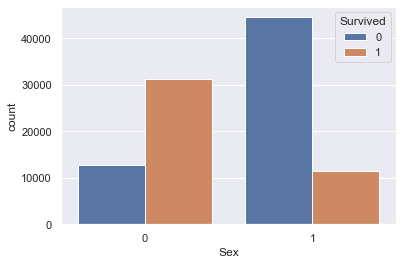

In [31]:
sns.countplot(x='Sex', hue='Survived', data=df)

Видим, что мужчин погибло гораздо больше, чем выжило, и большая часть женщин выжила

Визуализируем зависимость выживаемости от класса каюты

<AxesSubplot:xlabel='Pclass', ylabel='count'>

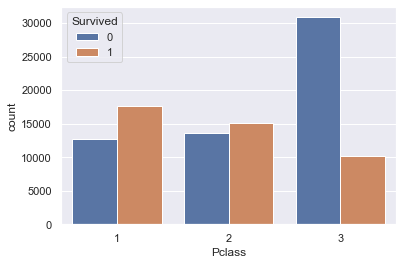

In [32]:
sns.countplot(x='Pclass', hue='Survived', data=df) 

Видим всплеск среди погибших пассажиров 3 класса, и что больше всего выживших из первого классса

А потом учат, что деньги в жизни не главное...

Визуализируем зависимость выживаемости от типа каюты (буквы, с которой начинается номер)

<AxesSubplot:xlabel='Cabin_type', ylabel='count'>

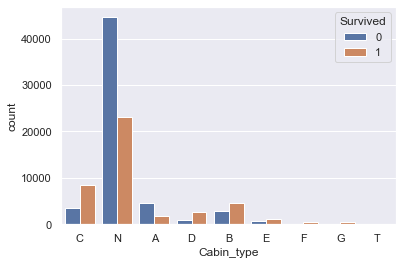

In [33]:
sns.countplot(x='Cabin_type', hue='Survived', data=df) 

Видим, что большмнство погибших не имело номера каюты

Посмотрим какого пола люди в разных классах

<AxesSubplot:xlabel='Pclass', ylabel='count'>

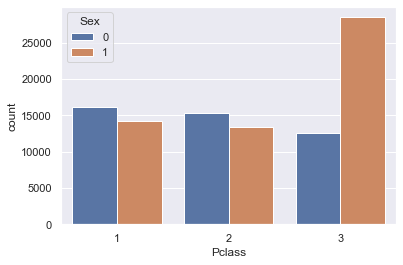

In [34]:
sns.countplot(x='Pclass', hue='Sex', data=df) 

посмотрим еще несколько зависимостей через boxplot

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

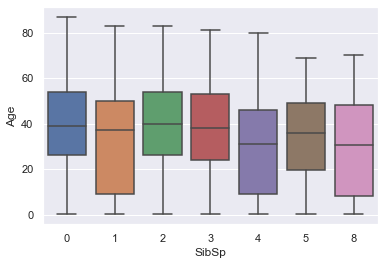

In [35]:
sns.boxplot(data=df, x="SibSp", y="Age")

Видим, что большинство пасаажиров путешествующих без братьев, сестер и супругов, были 40-летнего возраста

<AxesSubplot:xlabel='Parch', ylabel='Age'>

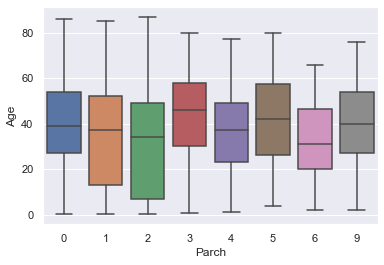

In [36]:
sns.boxplot(data=df, x="Parch", y="Age")

Видим, что большинство детей, имело двоих родителей на Титанике

<AxesSubplot:xlabel='Survived', ylabel='Age'>

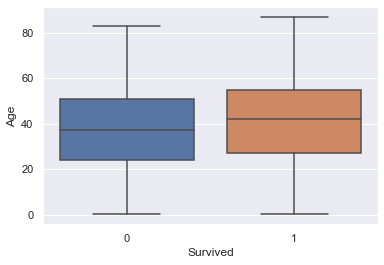

In [37]:
sns.boxplot(data=df, x='Survived', y='Age')

Видим, что выживали чуть-чуть больше пассажиры более взрослые

# Summary

НЕТ ВОЙНЕ

Иследовав данные, была обнаружена сильная корреляция выживаемости и пола пассажиров, она даже больше чем корреляция цены билета и класса каюты.

В целом главный вывод в том, что можно достаточно точно предсказать выжевет ли пассажар, посмотрев на его пол и класс каюты.

Менее значимые выводы были сделаны походу исследования данных.